<a href="https://colab.research.google.com/github/deeksha1010/Cats_Dogs/blob/main/cats_dogs_googlecollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
# Load the dataset directly from TFDS
(train_data, test_data), ds_info = tfds.load('cats_vs_dogs',
                                             split=['train[:80%]', 'train[80%:]'],
                                             with_info=True,
                                             as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.8IN088_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [2]:
ds_info = tfds.builder('cats_vs_dogs').info
# Print the number of examples
print(f"Total images: {ds_info.splits['train'].num_examples}")
print(f"Number of classes: {ds_info.features['label'].num_classes}")

Total images: 23262
Number of classes: 2


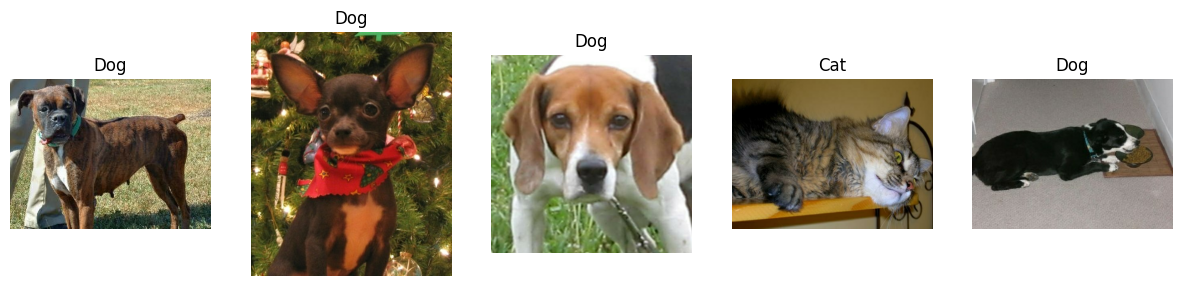

In [3]:
import matplotlib.pyplot as plt
def visualize_data(dataset,number_images=5):   #we are just checking first 5 data
    plt.figure(figsize=(15,8))  #width and height in inches
    for i,(image,label) in enumerate(dataset.take(number_images)):
        plt.subplot(1, number_images, i + 1)
        plt.imshow(image.numpy())      # Convert the Tensor to a NumPy array for displaying
        plt.title('Cat' if label == 0 else 'Dog')
        plt.axis('off')
    plt.show()
visualize_data(train_data)

In [4]:
#let us preprocess the data

In [5]:
image_height=64
image_width=64
def preprocess_image(image, label):
    image = tf.image.resize(image, [image_height, image_width])  # Resize images to 64x64
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

train_data = train_data.map(preprocess_image).batch(10).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(preprocess_image).batch(10).prefetch(tf.data.AUTOTUNE)

In [6]:
print(image_height)
print(image_width)

64
64


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization

model = Sequential([
    # Convolutional layers to capture spatial features
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output for dense layers
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')  # Binary classification output
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,737 (2.61 MB)

 Trainable params: 684,033 (2.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [9]:
from tensorflow.keras.optimizers import Adam
history=model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Try a lower learning rate :)
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [11]:
history = model.fit(train_data, validation_data=test_data, epochs=10,
                    callbacks=[early_stopping])

Epoch 1/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.6531 - loss: 0.6651 - val_accuracy: 0.7354 - val_loss: 0.5354
Epoch 2/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7672 - loss: 0.4838 - val_accuracy: 0.7771 - val_loss: 0.4897
Epoch 3/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.8167 - loss: 0.3976 - val_accuracy: 0.7831 - val_loss: 0.4809
Epoch 4/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8673 - loss: 0.3176 - val_accuracy: 0.7788 - val_loss: 0.5164
Epoch 5/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.9102 - loss: 0.2341 - val_accuracy: 0.7779 - val_loss: 0.5600
Epoch 6/10
1861/1861 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9474 - loss: 0.1600 - val_accuracy: 0.7659 - val_loss: 0.6632


In [12]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')


466/466 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7837 - loss: 0.4840
Test accuracy: 0.7831040620803833
